In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

### Load data

In [2]:
df = pd.read_csv("original_data.csv")
df_ai = pd.read_csv("ai.csv")
df_non_ai = pd.read_csv("non_ai.csv")


In [4]:
print("Original: ", df.columns, len(df))
print("AI: ", df_ai.columns, len(df_ai))
print("NonAI: ", df_non_ai.columns, len(df_non_ai))

Original:  Index(['Unnamed: 0', 'url', 'name', 'owner', 'forks', 'stars', 'languages',
       'commits', 'creation_date', 'contributors', 'topics', 'watchers',
       'readme', 'releases', 'pull_requests', 'readme_size', 'commits_freq',
       'releases_freq', 'lines_of_codes', 'popularity_score_1',
       'popularity_score_2', 'popularity_score_3', 'releases_count'],
      dtype='object') 185876
AI:  Index(['Unnamed: 0', 'url', 'name', 'owner', 'forks', 'stars', 'languages',
       'commits', 'creation_date', 'contributors', 'topics', 'watchers',
       'readme', 'releases', 'pull_requests', 'readme_size', 'commits_freq',
       'releases_freq', 'lines_of_codes', 'popularity_score_1',
       'popularity_score_2', 'popularity_score_3', 'releases_count'],
      dtype='object') 6545
NonAI:  Index(['Unnamed: 0', 'url', 'name', 'owner', 'forks', 'stars', 'languages',
       'commits', 'creation_date', 'contributors', 'topics', 'watchers',
       'readme', 'releases', 'pull_requests', 'read

### functions from prepare_data.py

In [5]:
def convert_columns_to_float32(df, columns):
    for col in columns:
        df[col] = df[col].astype('float32')
    return df

def prepare_data(input_columns, target_column, df_cleaned):
    df_cleaned = convert_columns_to_float32(df_cleaned, input_columns+[target_column])

    # Extract the input and target data
    X = df_cleaned[input_columns]
    y = df_cleaned[target_column]

    # Split the data into training and testing sets with a fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize using only training set statistics
    dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
    for k, dtype in dtypes:
        if dtype == "float32":
            mean = X_train[k].mean()
            std = X_train[k].std()

            # Apply normalization
            X_train.loc[:, k] = (X_train[k] - mean) / std
            X_test.loc[:, k] = (X_test[k] - mean) / std

    # print("X_train: {}".format(X_train.shape))
    # print("y_train: {}".format(y_train.shape))
    # print("X_test: {}".format(X_test.shape))
    # print("y_test: {}".format(y_test.shape))

    return X_train, X_test, y_train, y_test, dtypes

### Train Linear Regression model

In [6]:
def linear_regression(features, target, df):
    # get train and test data
    X_train, X_test, y_train, y_test, dtypes = prepare_data(features, target, df)

    # train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # print score
    print(f"R²: {model.score(X_test, y_test)}")
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    
    print(f"MAE: {mae}")

    print(f"RMSE: {rmse}")

    # get coefficients
    feature_coef = pd.DataFrame({'feature': features, 'coefficient': model.coef_})
    feature_coef = feature_coef.sort_values(by='coefficient')

    # create plot
    plt.figure(figsize=(10, 5))
    bars = plt.barh(feature_coef['feature'], feature_coef['coefficient'], color='skyblue')

    # add coef value
    # for bar in bars:
    #     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
    #             bar.get_width(), va='center', ha='left', fontsize=10)

    plt.xlabel("Feature Importance (Coefficient)")
    plt.ylabel("Features")
    plt.title("Feature Importance in Linear Regression (" + target + ")" )
    plt.show()

    print(feature_coef[::-1])

### stars as target

#### Original

R²: 0.611494251475617
MAE: 769.5905151367188
RMSE: 2868.441162109375


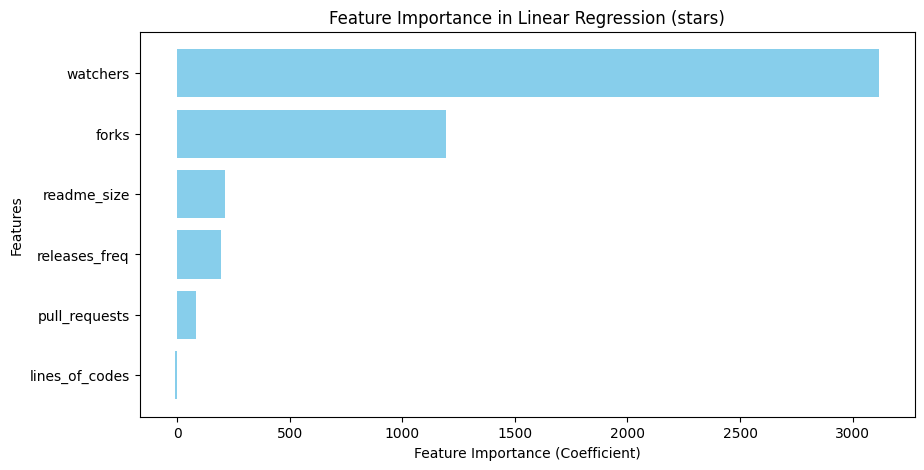

          feature  coefficient
1        watchers  3118.667969
0           forks  1193.216309
3     readme_size   213.837112
4   releases_freq   193.024170
2   pull_requests    85.978394
5  lines_of_codes   -10.475430


In [7]:
features = ['forks', 'watchers', 'pull_requests', 'readme_size', 'releases_freq', 'lines_of_codes']
linear_regression(features, 'stars', df)

#### AI

R²: 0.49592899342821106
MAE: 1134.4669189453125
RMSE: 4656.18017578125


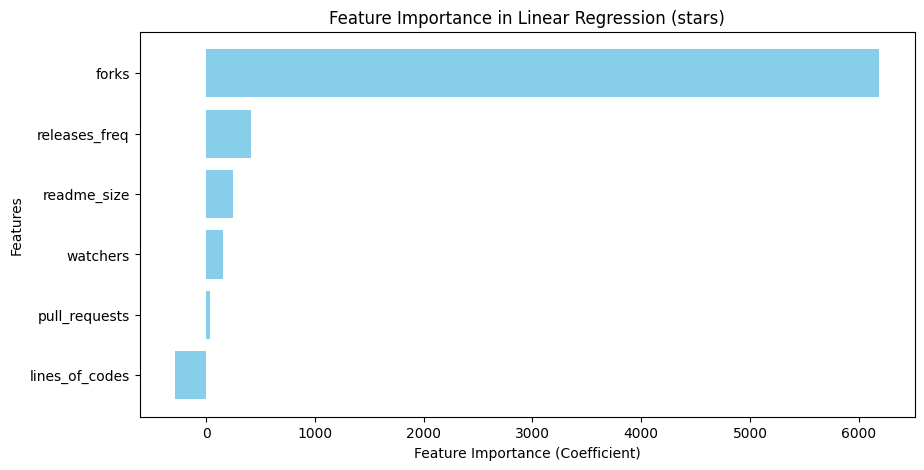

          feature  coefficient
0           forks  6187.625977
4   releases_freq   416.534393
3     readme_size   250.457916
1        watchers   152.567413
2   pull_requests    35.229919
5  lines_of_codes  -288.141235


In [8]:
linear_regression(features, 'stars', df_ai)

#### NonAI

R²: 0.5127403136912232
MAE: 714.8224487304688
RMSE: 3067.338623046875


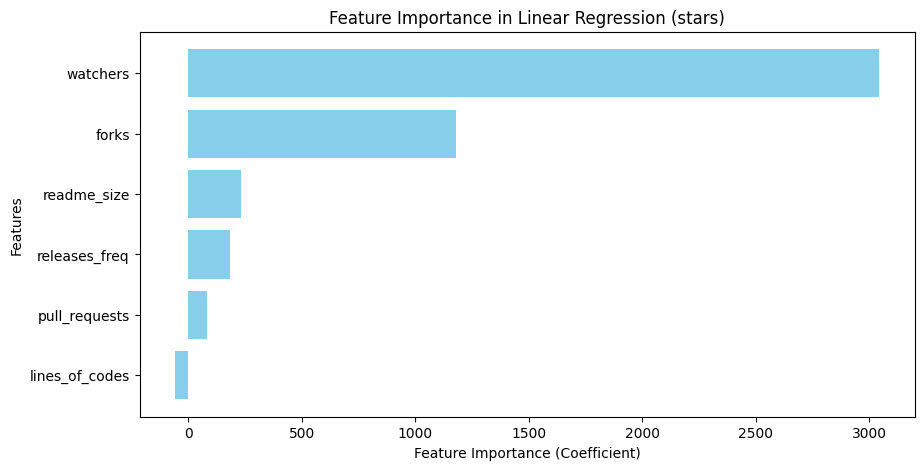

          feature  coefficient
1        watchers  3044.698730
0           forks  1180.532227
3     readme_size   232.372711
4   releases_freq   182.445038
2   pull_requests    83.016235
5  lines_of_codes   -60.055641


In [9]:
linear_regression(features, 'stars', df_non_ai)

### popularity_score_3 (star + fork) as target

#### Original

R²: 0.5687791998300322
MAE: 931.5867309570312
RMSE: 3541.341064453125


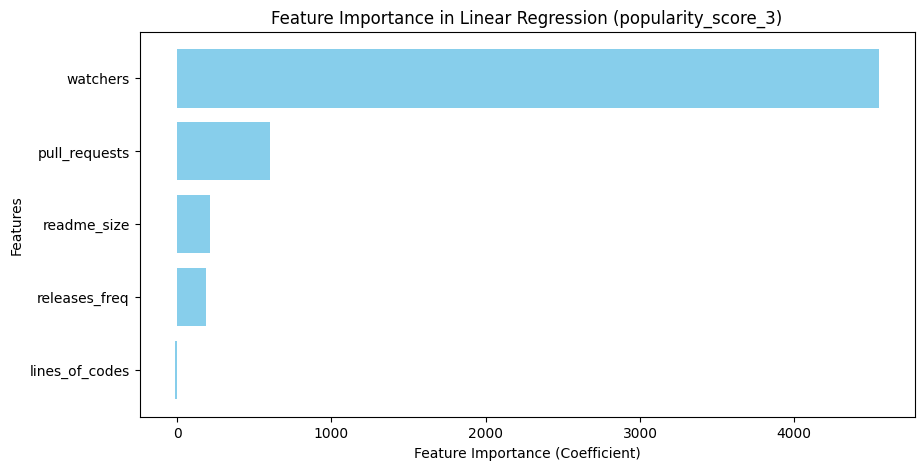

          feature  coefficient
0        watchers  4551.226562
1   pull_requests   598.419678
2     readme_size   215.075012
3   releases_freq   185.175629
4  lines_of_codes   -15.744994


In [10]:
features = ['watchers', 'pull_requests', 'readme_size', 'releases_freq', 'lines_of_codes']
linear_regression(features, 'popularity_score_3', df)

#### AI

R²: 0.8184555634726028
MAE: 1238.18359375
RMSE: 3431.983154296875


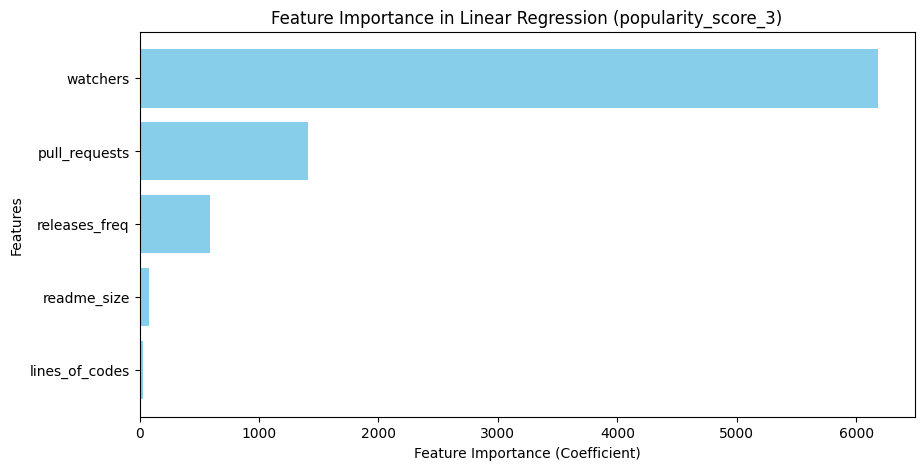

          feature  coefficient
0        watchers  6178.783203
1   pull_requests  1412.008667
3   releases_freq   588.691406
2     readme_size    78.013474
4  lines_of_codes    30.105072


In [11]:
linear_regression(features, 'popularity_score_3', df_ai)

#### NonAI

R²: 0.4796873242910482
MAE: 863.6860961914062
RMSE: 3675.493408203125


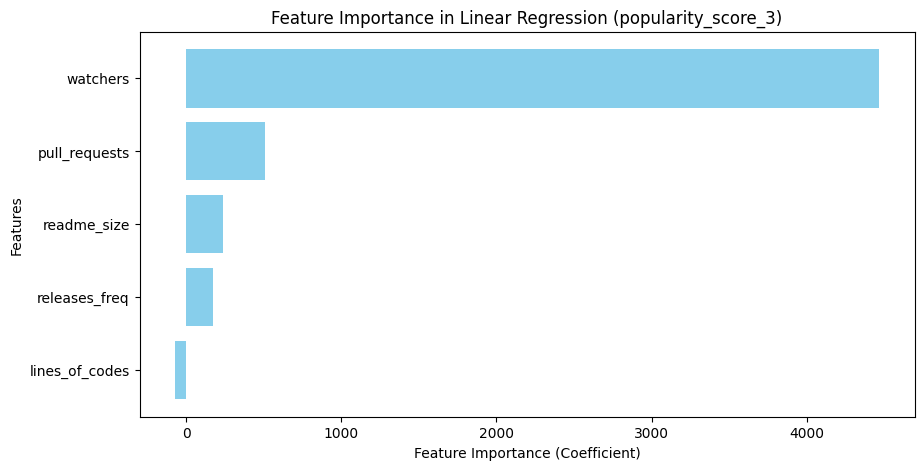

          feature  coefficient
0        watchers  4467.009277
1   pull_requests   507.210266
2     readme_size   235.696182
3   releases_freq   174.453400
4  lines_of_codes   -73.293961


In [12]:
linear_regression(features, 'popularity_score_3', df_non_ai)